In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyetbd.rules import fdfs, fitness_calculation, selection, recombination, mutation
plt.rcParams.update({
'figure.figsize': (6, 6),
'figure.dpi': 300,
'axes.spines.top': False,
'axes.spines.right': False,
'axes.linewidth': 1.0,
'axes.prop_cycle': plt.cycler(color='kbrgymc'),
'font.family': 'Helvetica Neue',
'font.size': 12,
'legend.frameon': 'false'
})

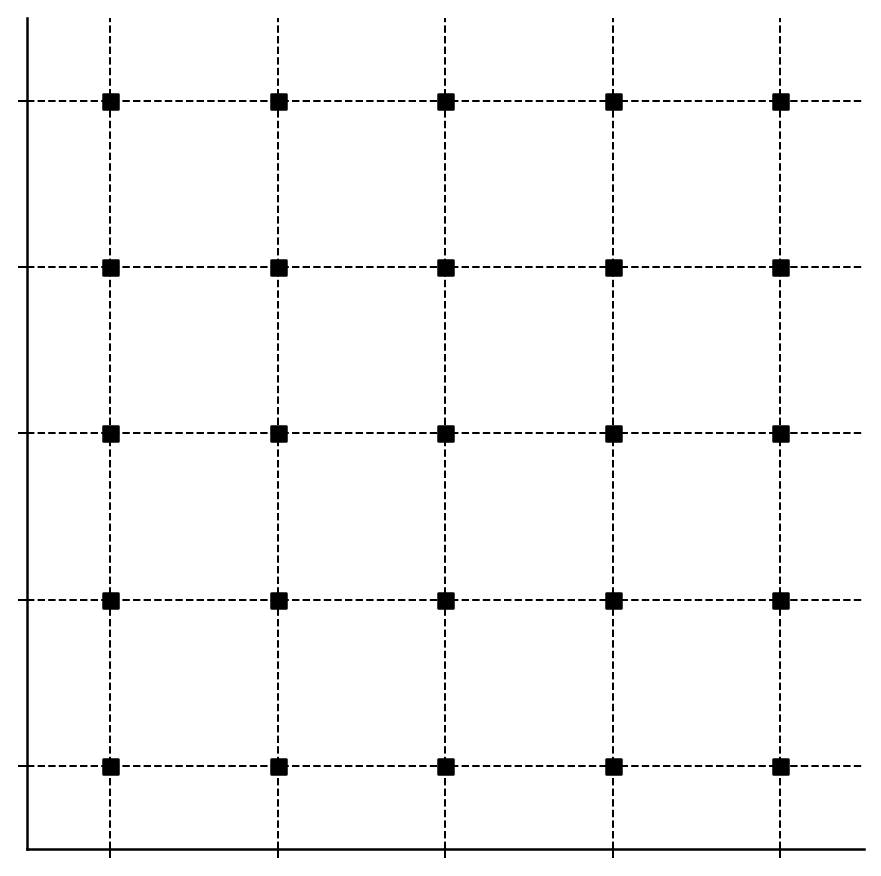

In [2]:
fig, ax = plt.subplots(dpi=180)

# Draw a grid
ax.grid(True, linestyle='--', color='black')
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.5, 4.5)
ax.set_xticklabels([])
ax.set_yticklabels([])

x_vals = []
y_vals = []

for i in range(5):
    for j in range(5):
        x_vals.append(i)
        y_vals.append(j)

ax.scatter(x_vals, y_vals, color='black', marker='s')

plt.show()

In [3]:
from src.animator import Animator

animator = Animator(5, 5, [0, 1, 6, 7, 12, 17, 16, 11, 10, 15, 16])
animator.create_animation(1000)
animator.save_animation('test.gif')

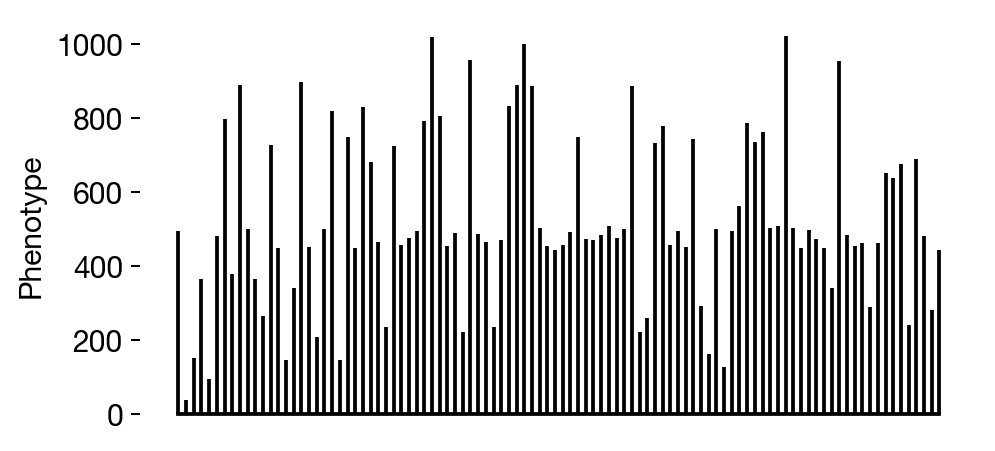

In [4]:
population = np.random.randint(448, 511, 40)
population2 = np.random.randint(0, 1024, 60)

# combine the two populations
population = np.concatenate((population, population2))

# randomly shuffle the population
np.random.shuffle(population)

# population = np.random.randint(0, 1024, 100)

# make a pin plot of the population
fig, ax = plt.subplots(dpi=180, figsize=(6, 3))

ax.stem(population, markerfmt=' ', linefmt='black', basefmt='black')
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_ylabel('Phenotype')

ax.spines[:].set_visible(False)


plt.show()

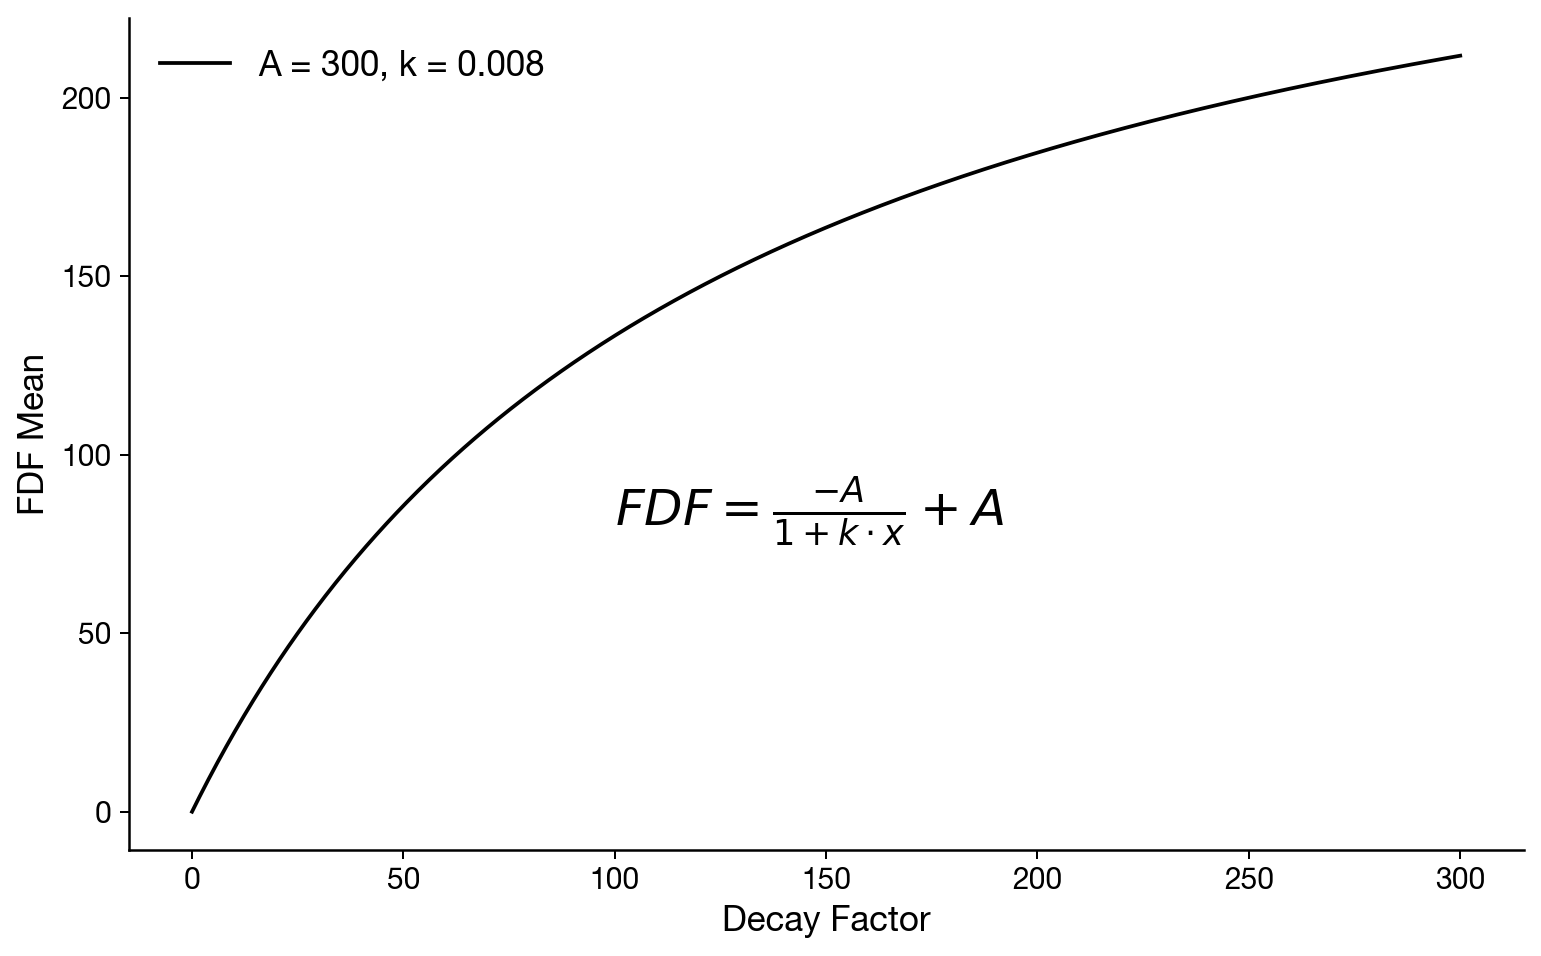

In [5]:
fig, ax = plt.subplots(dpi=180, figsize=(10, 6))

hyperbolic_decay_fn = lambda x, A, k: (-A / (1 + k * x)) + A

x = np.linspace(0, 300, 1000)
y = hyperbolic_decay_fn(x, 300, 0.008)

ax.text(100, 80, r'$FDF = \frac{-A}{1 + k \cdot x} + A$', fontsize=20)
ax.plot(x, y, color='black', label='A = 300, k = 0.008')
ax.set_xlabel('Decay Factor', fontsize=14)
ax.set_ylabel('FDF Mean', fontsize=14)
ax.legend(fontsize=14, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [6]:
def linear_fdf(x, u):
    return (-2 / (9 * u**2)) * x + (2 / (3 * u))

def exponential_fdf(x, mean):
    return (1 / mean) * np.exp(-x / mean)


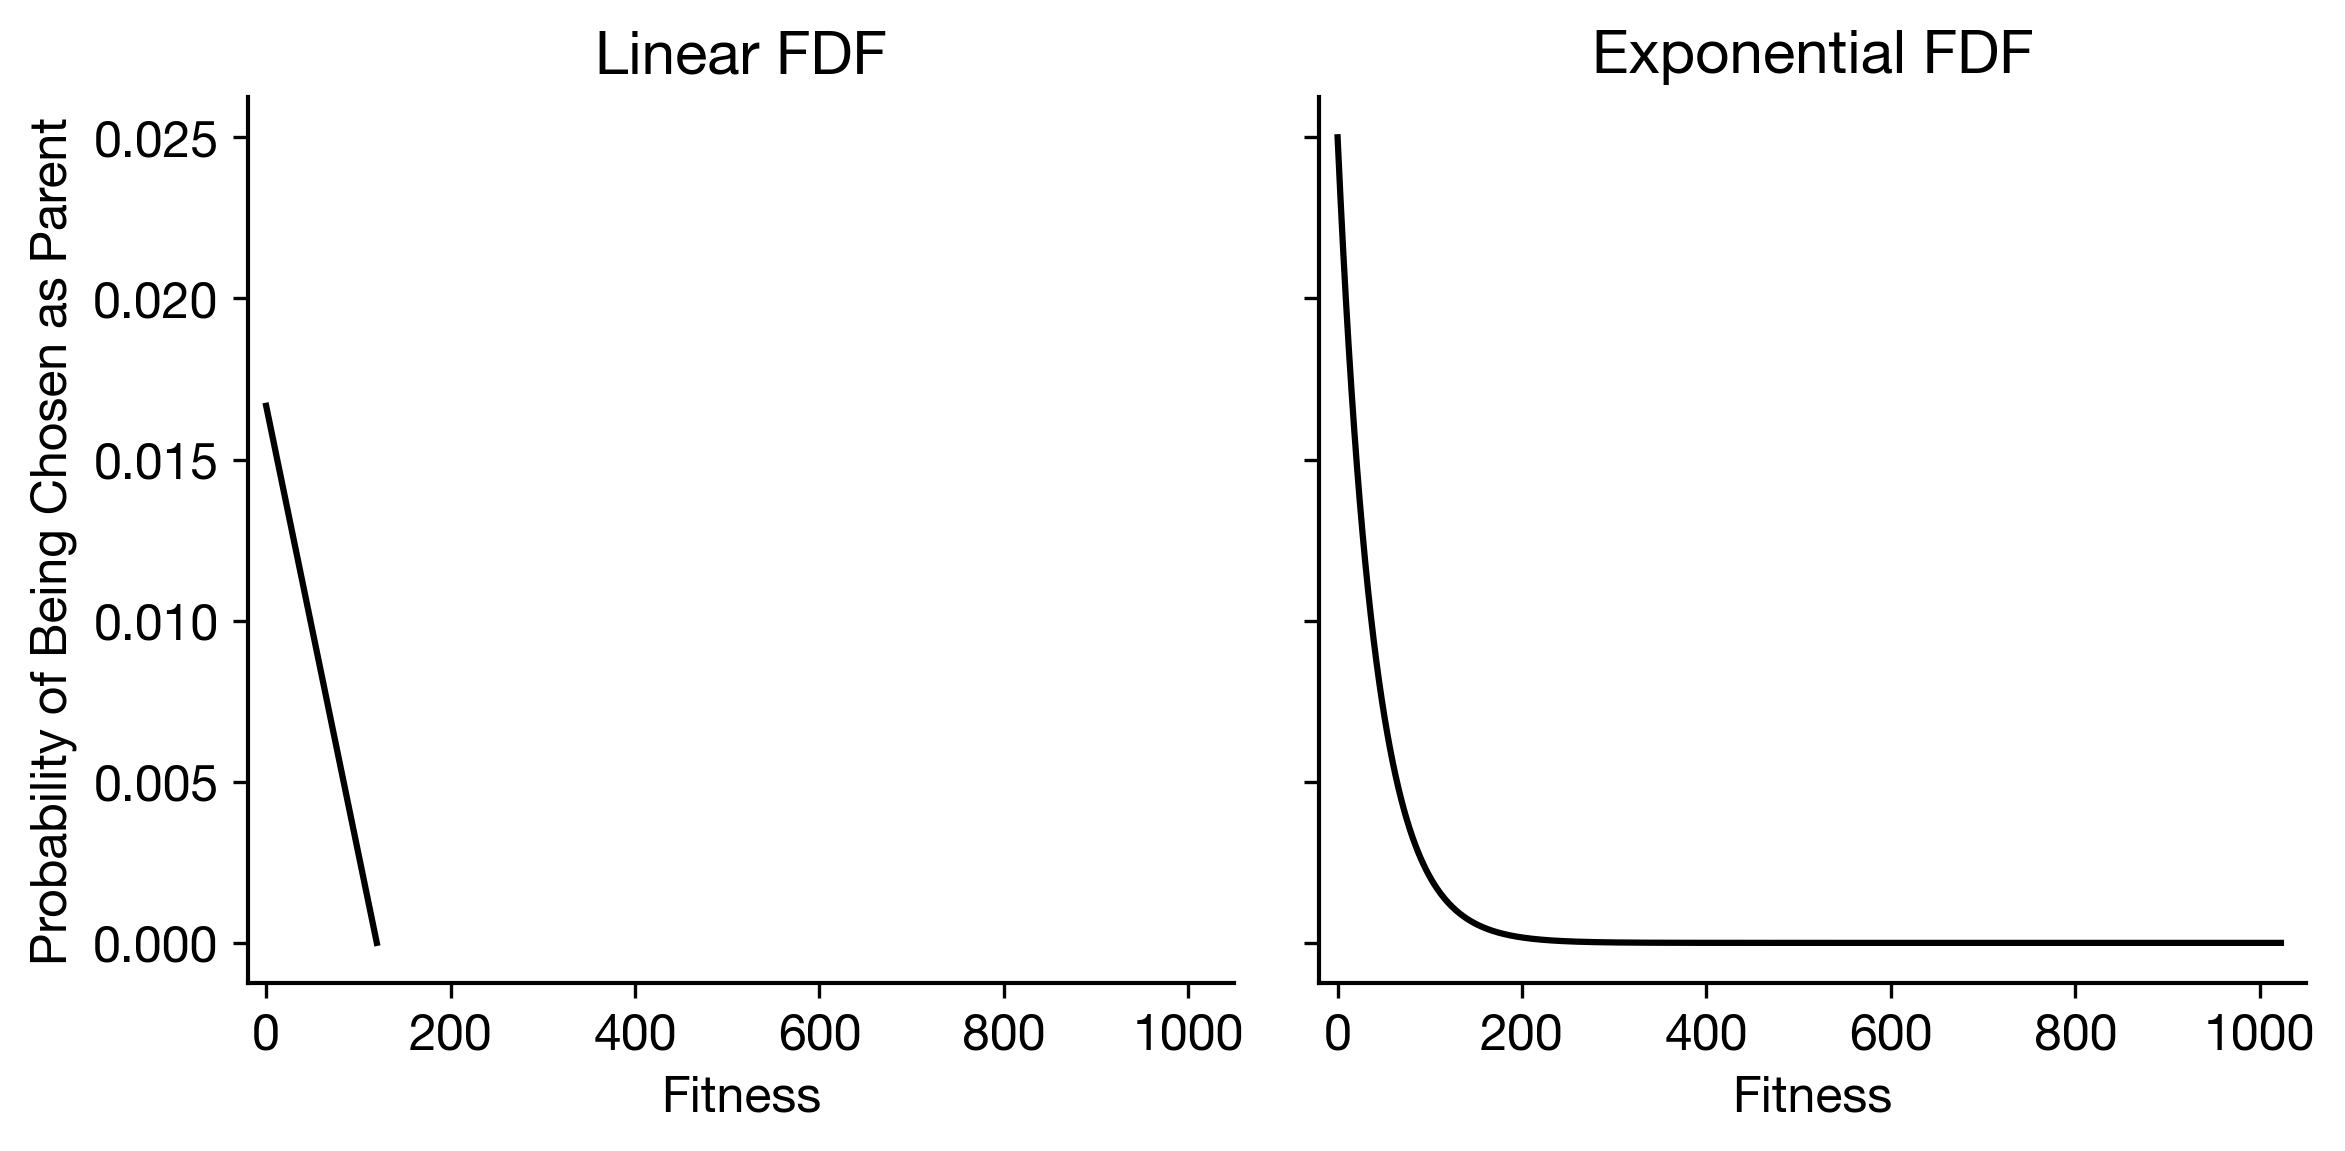

In [8]:
fig, axs = plt.subplots(1, 2, dpi=300, figsize=(8, 4), sharey=True)
x1 = np.linspace(0, 120, 1000)
y1 = linear_fdf(x1, 40)
x2 = np.linspace(0, 1023, 1024)
y2 = exponential_fdf(x2, 40)

axs[0].plot(x1, y1, color='black')
axs[0].set_title('Linear FDF')
axs[0].set_xlabel('Fitness')
axs[0].set_ylabel('Probability of Being Chosen as Parent')
axs[0].set_xlim(-20, 1050)

axs[1].plot(x2, y2, color='black')
axs[1].set_title('Exponential FDF')
axs[1].set_xlabel('Fitness')
axs[1].set_xlim(-20, 1050)
plt.tight_layout()
plt.show()

In [ ]:
population = np.random.randint(0, 1024, 100)

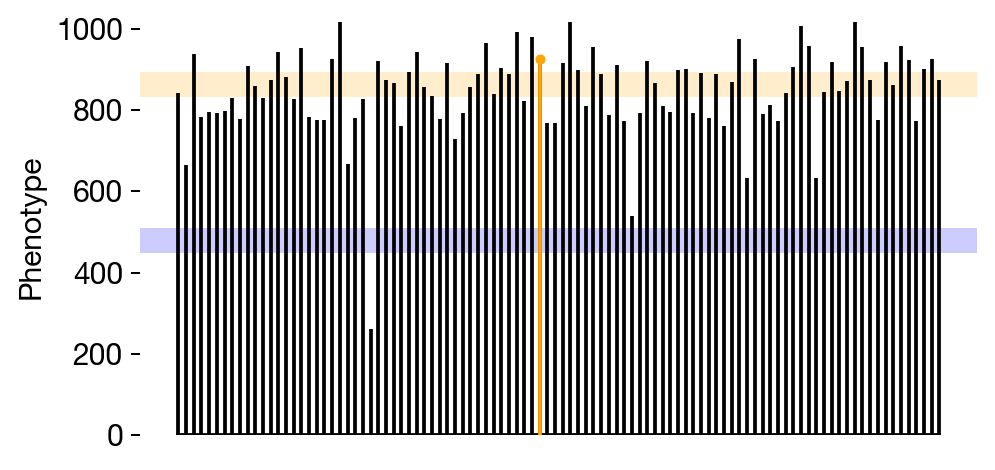

In [97]:

def graph_population(population, special_stem_index=None, special_stem_color='orange'):
    # Create the plot
    fig, ax = plt.subplots(dpi=180, figsize=(6, 3))
    stem_container = ax.stem(population, markerfmt=' ', linefmt='black', basefmt='black')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylabel('Phenotype')
    ax.set_ylim(0, 1024)

    ax.axhspan(832, 895, color='orange', alpha=0.2, label='Right', linewidth=0)
    ax.axhspan(448, 511, color='blue', alpha=0.2, label='Up', linewidth=0)
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, frameon=False)

    ax.spines[:].set_visible(False)

    # Customize the color of a specific stem, e.g., the 10th stem
    if special_stem_index is not None:
        special_x = [special_stem_index]
        special_y = [population[special_stem_index]]

        # Overlay the special stem with a different color
        ax.stem(
            special_x, special_y,
            markerfmt='.', linefmt=special_stem_color, basefmt=' ',
        )
        

    plt.show()

graph_population(population, 47)


In [71]:
parents = selection.randomly_select_parents(population)
offspring = recombination.recombine_parents(parents, 10, recombination.bitwise_combine)
mutated_offspring = mutation.bit_flip_mutate(offspring, 0.1)

In [72]:
mutated_offspring 

array([ 774,  460,  372,  863,  283,  895,  772,   59,  965,  510,  801,
        130,  440,  251,  875,  911,  689,  782,  129,  657,  652,  740,
        989,  407,  742,   19,  963,  733,  644,  638,  452,  399,  465,
         86,   68,   14,  193,  782,  427,  197,  774,  251,  372,  683,
        192,  724,  367,  372,  998,   77,  588,  441,  828,  903,  571,
        132,  168,  426,  889,  379,  552,  224,  350,  554,  757,  124,
        967,  843,  103,  396,  866,  897,  582,  544,   62,   16,  704,
        179,  640,  688,   49,  887,  774,  415,   59,  421, 1003,  202,
        431,   16,  548,  555,  790,  878, 1013,  685,  340,  968,  964,
        672])

In [78]:
np.where(mutated_offspring == 465)[0][0]

32

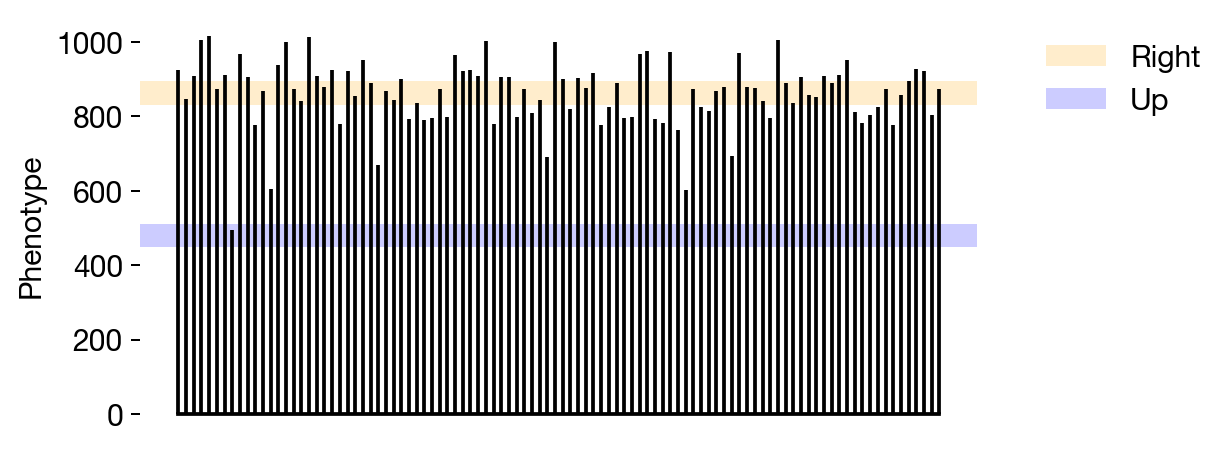

In [84]:
graph_population(mutated_offspring)

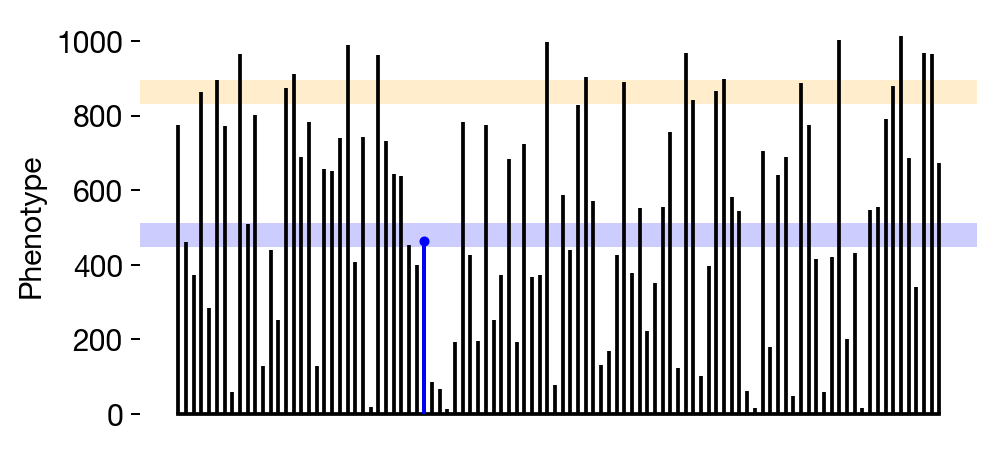

In [79]:
graph_population(mutated_offspring, 32, 'blue')

In [90]:
population = mutated_offspring

In [95]:
fitness_values = fitness_calculation.get_circular_fitness_values(population, 465, 1023)
fit_parents = selection.fitness_search_selection(population, fitness_values, 40, fdfs.sample_exponential_fdf)
offspring = recombination.recombine_parents(fit_parents, 10, recombination.bitwise_combine)
mutated_offspring = mutation.bit_flip_mutate(offspring, 0.1)

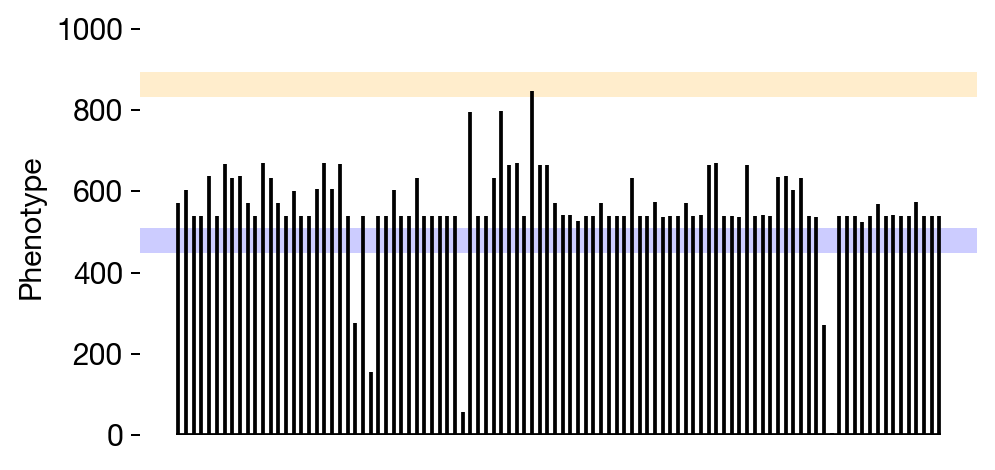

In [98]:
graph_population(mutated_offspring)